In [1]:
# Standard modules
import pdb
import sys
import os
import pickle
import numpy as np
import pandas as pd
from lmfit import Parameters, minimize, fit_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sys.path.append("..")

from simstackwrapper import SimstackWrapper
from simstackresults import SimstackResults
from simstackplots import SimstackPlots
from simstacktoolbox import SimstackToolbox

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [3]:
# Import catalog with SimstackWrapper
combined_pickle_filename = "cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10_X_4_foregnd_atonce_bootstrap_1-150"
combined_pickle_path = os.environ['PICKLESPATH']+'/'+os.path.join("simstack","stacked_flux_densities", combined_pickle_filename)
path_ini_file = os.path.join(combined_pickle_path, "cosmos2020_farmer.ini")
path_pickle_file = os.path.join(combined_pickle_path, combined_pickle_filename+".pkl")
if os.path.isfile(combined_pickle_path):
    simstack_catalog_object = SimstackWrapper(path_ini_file, read_maps=False, read_catalog=True, keep_catalog=True, stack_automatically=False, save_automatically=False)
else:
    print(combined_pickle_path+' not found')

D:\pickles/simstack\stacked_flux_densities\cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10_X_4_foregnd_atonce_bootstrap_1-150 not found


In [3]:
# Import saved stacking results
simstack_object = SimstackToolbox.import_saved_pickles(path_pickle_file)

In [4]:
# Inspect object keys
simstack_object.results_dict['band_results_dict'].keys()

dict_keys(['mips_24', 'pacs_green', 'pacs_red', 'spire_psw', 'spire_pmw', 'spire_plw', 'scuba_850'])

In [5]:
# Pass saved results into SimstackResults
simstack_object = SimstackResults(simstack_object)

In [6]:
# Pass saved results into SimstackPlots
simstack_object = SimstackPlots(simstack_object)

In [7]:
# Call parse_results which translates the raw results into a results_dict for plotting/interpreting.
simstack_object.parse_results(catalog_object=simstack_catalog_object, estimate_mcmcs=False)

In [8]:
# Extract SEDs Dict
sed_results_dict = simstack_object.results_dict['sed_bootstrap_results_dict']

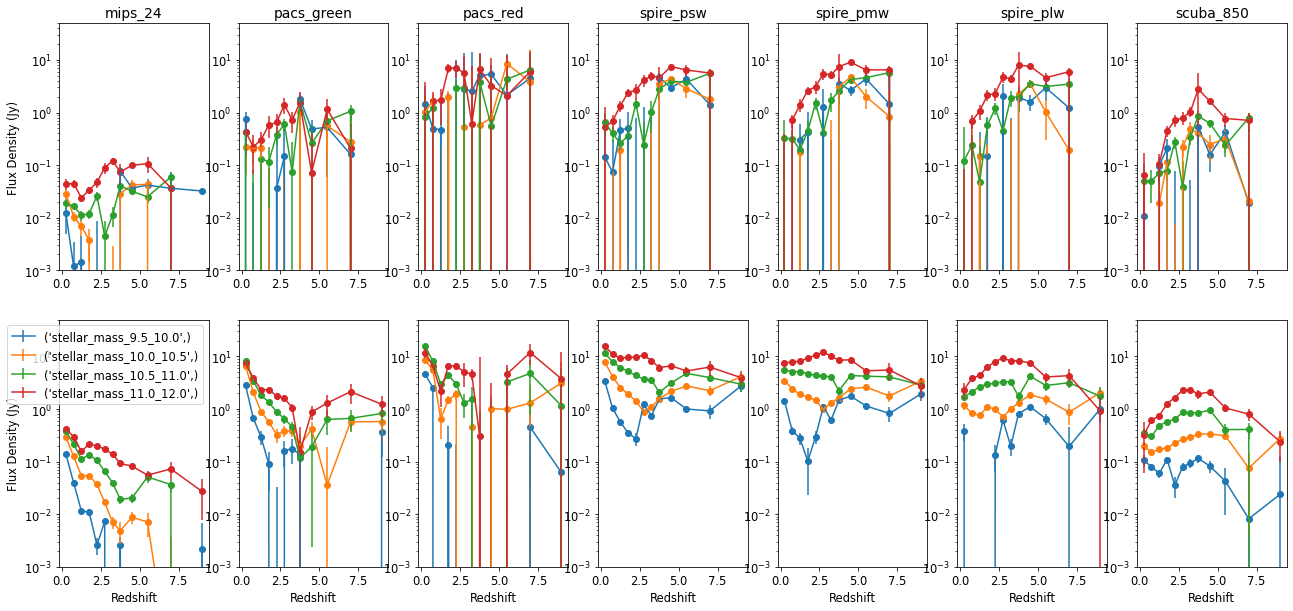

In [9]:
simstack_object.plot_flux_densities()

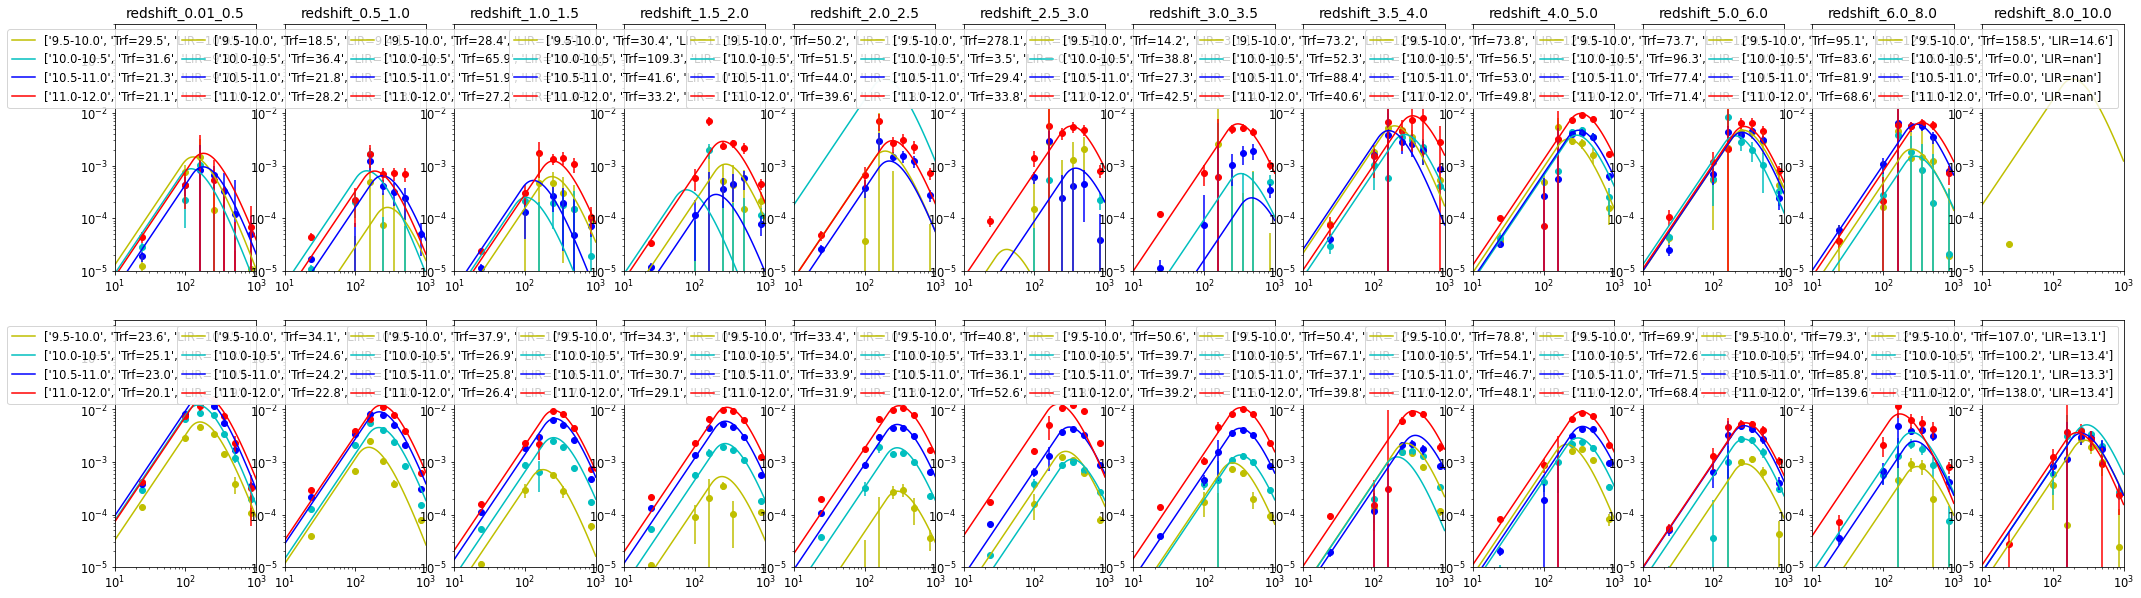

In [10]:
simstack_object.plot_seds(sed_results_dict)

In [9]:
# Extract Bootstrap Dict
bootstrap_results_dict = simstack_object.results_dict['bootstrap_results_dict']

In [11]:
sample_number = 15000
sample_discard = 3000
sample_sigma = 3
sample_qt = True
sample_speed = ''
sample_prior = '_mixed_prior_qt'
sample_prefix = "{}-{}-{}sigma{}{}".format(sample_number, sample_discard, sample_sigma, sample_speed, sample_prior)

In [10]:
not_flat_prior = ['redshift_1.5_2.0__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_1.5_2.0__stellar_mass_10.0_10.5__split_params_1',
                  'redshift_1.5_2.0__stellar_mass_10.5_11.0__split_params_1',
                  'redshift_2.0_2.5__stellar_mass_10.0_10.5__split_params_1',
                  'redshift_2.0_2.5__stellar_mass_10.5_11.0__split_params_1']

In [12]:
# Load MCMC results
include_qt = sample_qt
overwrite_samples = False
samples_filename  ='_'.join(['mcmc_samples',sample_prefix,'dict'])+'.pkl'
print(os.path.isfile(os.path.join(combined_pickle_path+underscore_suffix,samples_filename)))
if os.path.isfile(os.path.join(combined_pickle_path+underscore_suffix,samples_filename)) and not overwrite_samples:
    flat_samples_dict = import_saved_pickles(os.path.join(combined_pickle_path+underscore_suffix,samples_filename))
    print('importing ',flat_samples_dict.keys())
else:
    print('estimating ',samples_filename)
    if sample_speed == 'slow':
        slow = True
    else:
        slow = False
    flat_samples_dict = simstack_object.loop_mcmc_sed_estimator(sed_results_dict, simstack_catalog_object.catalog_dict['tables'], mcmc_iterations=sample_number, mcmc_discard=sample_discard, sigma_upper_limit=sample_sigma, slow=slow, flat_prior=not_flat_prior, include_qt=include_qt)

False
estimating  mcmc_samples_15000-3000-3sigma_mixed_prior_qt_dict.pkl


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [05:52<00:00, 42.61it/s]


redshift_1.5_2.0__stellar_mass_9.5_10.0__split_params_1  informative prior


100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [00:06<00:00, 2432.49it/s]


redshift_1.5_2.0__stellar_mass_10.0_10.5__split_params_1  informative prior


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:08<00:00, 35.02it/s]


redshift_1.5_2.0__stellar_mass_10.5_11.0__split_params_1  informative prior


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [05:45<00:00, 43.39it/s]


redshift_2.0_2.5__stellar_mass_10.0_10.5__split_params_1  informative prior


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:40<00:00, 37.46it/s]


redshift_2.0_2.5__stellar_mass_10.5_11.0__split_params_1  informative prior


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:39<00:00, 37.57it/s]


redshift_8.0_10.0__stellar_mass_9.5_10.0__split_params_0
dz_median nans
[8.60605 9.60605]


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:04<00:00, 35.36it/s]


redshift_8.0_10.0__stellar_mass_10.0_10.5__split_params_0
np.percentile failed
[nan nan]
redshift_8.0_10.0__stellar_mass_10.0_10.5__split_params_0
dz_median nans
[nan nan]


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:30<00:00, 33.33it/s]


redshift_8.0_10.0__stellar_mass_10.5_11.0__split_params_0
np.percentile failed
[nan nan]
redshift_8.0_10.0__stellar_mass_10.5_11.0__split_params_0
dz_median nans
[nan nan]


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:39<00:00, 37.56it/s]


redshift_8.0_10.0__stellar_mass_11.0_12.0__split_params_0
np.percentile failed
[nan nan]
redshift_8.0_10.0__stellar_mass_11.0_12.0__split_params_0
dz_median nans
[nan nan]


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [05:59<00:00, 41.71it/s]


In [13]:
# Save MCMC results
samples_filename  ='_'.join(['mcmc_samples',sample_prefix,'dict'])+'.pkl'
pickle_path = os.environ['PICKLESPATH']+'/'+os.path.join("simstack","stacked_flux_densities",combined_pickle_filename)
path_samples_file = os.path.join(combined_pickle_path+underscore_suffix, samples_filename)
print(path_samples_file)
simstack_object.save_to_pickles(path_samples_file, flat_samples_dict)

D:\pickles/simstack\stacked_flux_densities\cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10_X_4_foregnd_atonce_bootstrap_1-150\mcmc_samples_15000-3000-3sigma_mixed_prior_qt_dict.pkl


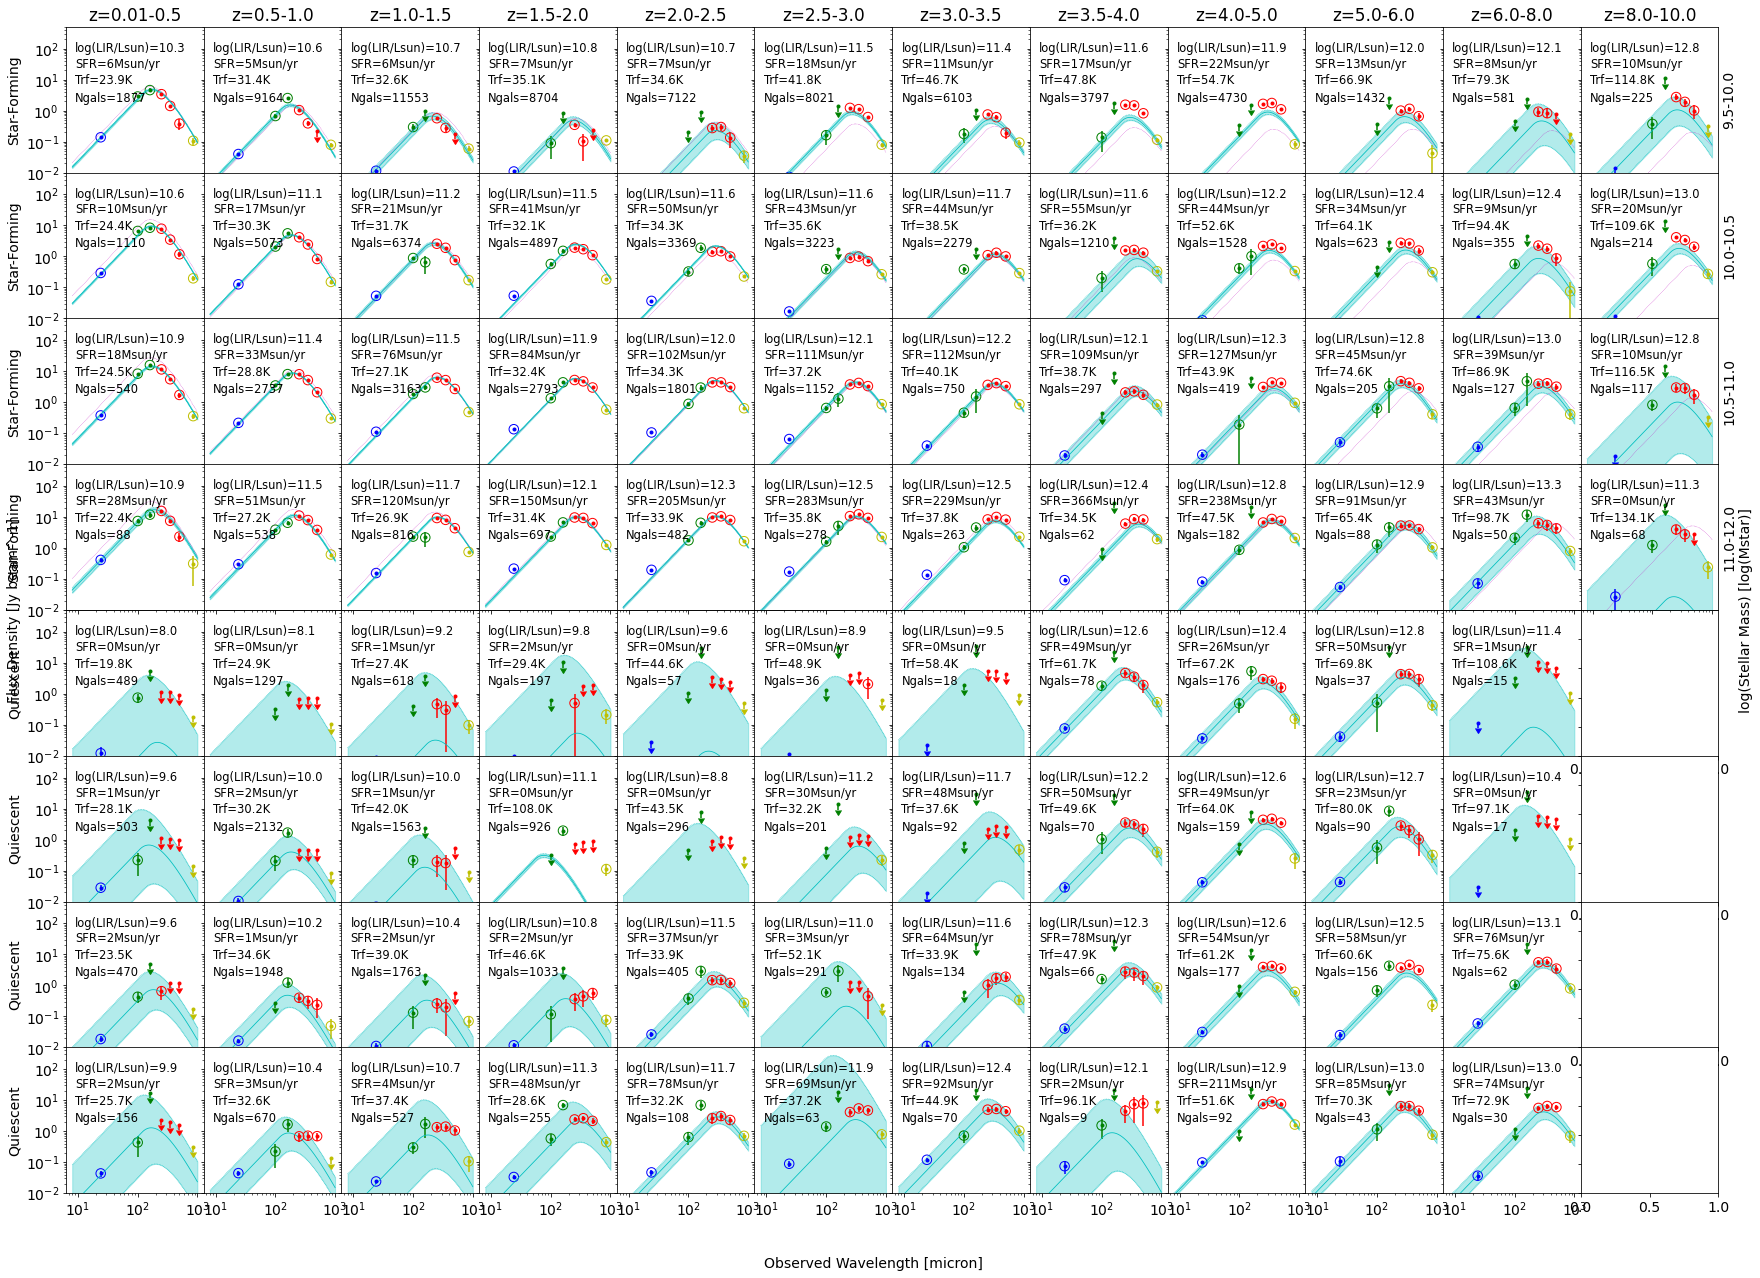

In [15]:
# Plot MCMC SEDs
simstack_object.plot_mcmc_seds(flat_samples_dict, bootstrap_dict=None, errors=('25', '75'), show_qt=True)